<a href="https://colab.research.google.com/github/karasu1982/drawMap/blob/main/drawMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#環境設定

In [ ]:
#@title ライブラリインストール

!pip install geopandas
!pip install japanize-matplotlib

In [2]:
#@title ライブラリインポート
# 基本ライブラリ
import pandas as pd
import numpy as np

# マップ・図形描写
import geopandas as gpd
import matplotlib.colors
import matplotlib.pyplot as plt
import japanize_matplotlib

# 元データ

## 地図データ
GeoJson形式

In [8]:
# 都道府県単位
!wget https://raw.githubusercontent.com/smartnews-smri/japan-topography/main/data/municipality/geojson/s0010/prefectures.json

--2022-10-10 12:29:00--  https://nlftp.mlit.go.jp/ksj/gml/data/N03/N03-2019/N03-190101_GML.zip
Resolving nlftp.mlit.go.jp (nlftp.mlit.go.jp)... 147.154.119.19, 192.29.105.247, 192.29.107.131
Connecting to nlftp.mlit.go.jp (nlftp.mlit.go.jp)|147.154.119.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 415944650 (397M) [application/zip]
Saving to: ‘N03-190101_GML.zip’

N03-190101_GML.zip  100%[===================>] 396.67M  18.7MB/s    in 38s     

2022-10-10 12:29:39 (10.3 MB/s) - ‘N03-190101_GML.zip’ saved [415944650/415944650]



In [9]:
# 市区町村単位
%%bash

wget https://nlftp.mlit.go.jp/ksj/gml/data/N03/N03-2019/N03-190101_GML.zip
unzip /content/N03-190101_GML.zip

Archive:  /content/N03-190101_GML.zip
  inflating: KS-META-N03-19_190101.xml  
  inflating: N03-19_190101.dbf       
  inflating: N03-19_190101.geojson   
  inflating: N03-19_190101.prj       
  inflating: N03-19_190101.shp       
  inflating: N03-19_190101.shx       
  inflating: N03-19_190101.xml       


In [10]:
tmp_df = gpd.read_file(filename="/content/N03-19_190101.geojson", encoding = 'SHIFT-JIS')
tmp_df.head(3)

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((144.08144 44.12506, 144.08143 44.125..."
1,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((143.78333 44.18453, 143.78281 44.183..."
2,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29495 44.00826, 144.29501 44.008..."


In [39]:
tmp_df[tmp_df["N03_004"].isin(["北見市"])]

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((144.08144 44.12506, 144.08143 44.125..."
1,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((143.78333 44.18453, 143.78281 44.183..."


In [58]:
tmp_df.head(10)

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((144.08144 44.12506, 144.08143 44.125..."
1,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((143.78333 44.18453, 143.78281 44.183..."
2,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29495 44.00826, 144.29501 44.008..."
3,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29602 44.01118, 144.29572 44.010..."
4,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29266 44.01945, 144.29295 44.018..."
5,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29121 44.02564, 144.29167 44.025..."
6,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.25745 44.08587, 144.25740 44.085..."
7,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.25753 44.08609, 144.25750 44.086..."
8,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.25757 44.08629, 144.25753 44.086..."
9,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.25739 44.08689, 144.25731 44.086..."


## 国勢調査データ

In [54]:
url = "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000032143614&fileKind=0"
df_kokucho = pd.read_excel(url, header=8)

In [56]:
# データ加工
df_kokucho["pref"] = df_kokucho["都道府県名"].apply(lambda x:x[3:])
df_kokucho["city_cd"] = df_kokucho["都道府県・市区町村名"].apply(lambda x:x[0:5])
df_kokucho["city"] = df_kokucho["都道府県・市区町村名"].apply(lambda x:x[6:])
df_kokucho["population"] = df_kokucho.iloc[0:,4]

df_kokucho = df_kokucho[["pref","city_cd","city","population"]]

In [57]:
df_kokucho.head(3)

,pref,city_cd,city,population
0,全国,00000,全国,126146099
1,北海道,01000,北海道,5224614
2,北海道,01100,札幌市,1973395


#関数設定

In [59]:
#@title 遠方島嶼部・離島の扱いに関する設定

def excl(option): #--Bool値（除く:True／除かない:False）
  excl1 = tmp_df[tmp_df['N03_003'].isin(['国後郡','択捉郡','色丹郡'])].index #--北方領土
  excl2 = tmp_df[(tmp_df['N03_001']=='東京都') & (tmp_df['N03_003'].str.endswith('支庁'))].index #--東京島嶼部
  excl3 = tmp_df[(tmp_df['N03_001']=='鹿児島県') & ((tmp_df['N03_003'] == '大島郡') | (tmp_df['N03_004'] == '奄美市'))].index #--鹿児島島嶼部
  excl4 = tmp_df[(tmp_df['N03_001']=='沖縄県') & ((tmp_df['N03_003'].isin(['八重山郡','宮古郡'])) | (tmp_df['N03_004'].isin(['宮古島市','石垣市','久米島町','渡嘉敷村','座間味村','粟国村','渡名喜村','北大東村','南大東村'])))].index #--沖縄離島
  excl = list(excl1)+list(excl2)+list(excl3)+list(excl4)
  if option == True:
    df_base = tmp_df[['N03_001','N03_007','geometry']].drop(index=excl)
  else:
    df_base = tmp_df[['N03_001','N03_007','geometry']]
  return df_base

In [76]:
#@title データ整備

def insertdata(input_df, option, fillval): #--option:島嶼部除外True/False、fillval:nullの場合の値
  l = {}
  c = {}
  for cd, val, city in zip(input_df['city_cd'], input_df["population"].fillna(fillval), input_df['city'].fillna('')):
    l[cd] = val
    c[cd] = city

  idx = []
  regions = []
  cities = []
  values = []
  df_base = excl(option)
  for id, cd, pref in zip(df_base.index, df_base['N03_007'],df_base['N03_001']):
    if cd in l.keys():
      values.append(l[cd])
      cities.append(c[cd])

      if pref == '北海道':
        regions.append('北海道')
      elif pref in ['青森県','岩手県','宮城県','秋田県','山形県','福島県']:
        regions.append('東北地方')
      elif pref in ['茨城県','栃木県','群馬県','埼玉県','千葉県','東京都','神奈川県','山梨県']:
        regions.append('関東地方')
      elif pref in ['新潟県','富山県','石川県','福井県']:
        regions.append('北陸地方')
      elif pref in ['長野県','岐阜県','静岡県','愛知県','三重県']:
        regions.append('中部・東海地方')
      elif pref in ['滋賀県','京都府','大阪府','兵庫県','奈良県','和歌山県']:
        regions.append('近畿地方')
      elif pref in ['鳥取県','島根県','岡山県','広島県','山口県']:
        regions.append('中国地方')
      elif pref in ['徳島県','香川県','愛媛県','高知県']:
        regions.append('四国地方')
      elif pref in ['福岡県','佐賀県','長崎県','熊本県','大分県','宮崎県','鹿児島県']:
        regions.append('九州地方')
      else:
        regions.append('沖縄')
    else:
      idx.append(id)

  dfex = df_base.drop(index=idx)
  dfex.insert(2,'region',regions)
  dfex.insert(3,'val',values)
  dfex.insert(4,'city',cities)

  return dfex

In [69]:
#@title マップ塗り分けカラースケール設定

def colors_scale(arr): #--数値データ
    n_min = min(arr)
    n_max = max(arr)
    cmap = plt.cm.Spectral_r #--★カラースケールを変更したい場合はplt.cm.以下の部分を変える★
    norm = matplotlib.colors.Normalize(vmin=n_min, vmax=n_max)
    arr = [cmap(norm(r)) for r in arr]
    return arr, cmap, norm

In [74]:
#@title マップ描画

def drawMap(input_df, area_type, area_list, option, fillval, annotation, figsize, edge): #--エリア指定タイプ、エリア、島嶼部除外True/False、null補充値
  df = insertdata(input_df, option, fillval)
  if area_type == '':
    mini_df = df
  elif area_type == 'pref':
    mini_df = df[df['N03_001'].isin(area_list)]
  elif area_type == 'region':
    mini_df = df[df['region'].isin(area_list)]
  num_color, cmap, norm = colors_scale(mini_df['val'])
  mini_df.plot(color=num_color, edgecolor = edge, figsize=figsize)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

  #annotation追加
  if annotation == True:
    mini_df.insert(5,'tcoords',mini_df['geometry'].apply(lambda x: x.representative_point().coords[:]))
    mini_df.insert(6,'coords',[coords[0] for coords in mini_df['tcoords']])
    for i, row in mini_df.iterrows():
      plt.annotate(row['city'],xy=row['coords'],horizontalalignment='center')
  else:
    pass

  plt.colorbar(sm)
  plt.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
  plt.tick_params(bottom=False,left=False,right=False,top=False)
  plt.tight_layout()
  plt.savefig('map.png')
  plt.show()
  print('map.pngに保存しました')

# 処理実行

In [78]:
#@title **条件設定**

#@markdown リージョン指定はregion、都道府県指定はprefを選択（全国は空欄）
area_type = 'pref' #@param ["","region","pref"]

#@markdown 指定したいリージョン名もしくは都道府県名を省略せずに入力（リスト型複数指定可）
area_list = ['神奈川県'] #@param

#@markdown 島嶼部や離島を除く場合はTrue（ただし本州・本島からの距離が遠いもののみ）
option = True #@param {type:'boolean'}

#@markdown データがない場合の穴埋め値
fillval = 0 #@param {type:'integer'}

#@markdown 市区町村名表示の有無
annotation = False #@param {type:'boolean'}

#@markdown 描画サイズ
figsize = (20,12) #@param

#@markdown 市区町村の境界線色指定
edge = 'gray' #@param ["none","black","gray","white"]

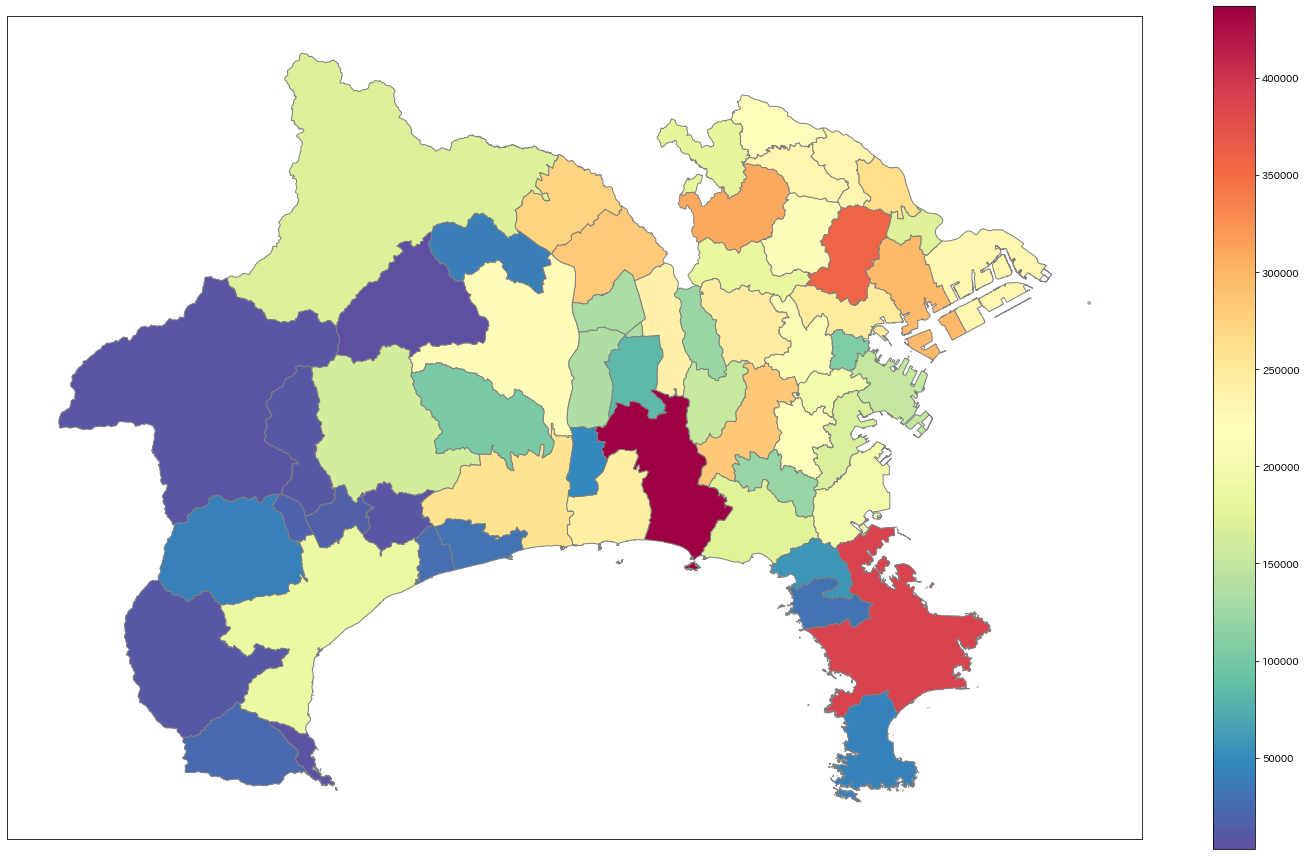

map.pngに保存しました


In [79]:
drawMap(df_kokucho, area_type, area_list, option, fillval, annotation, figsize, edge)